
# Mushroom Classification 

Data Set Information:
This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.

**Attributes**



Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [25]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as stats 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [26]:
msdf = pd.read_csv("mushrooms.csv")

In [27]:
msdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [28]:
msdf.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


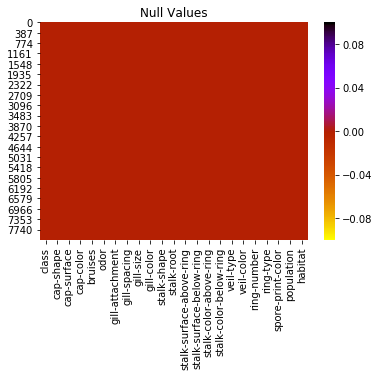

In [30]:
#Visualising Null Values 
sns.heatmap(msdf.isnull() , cmap = 'gnuplot_r')
plt.title('Null Values')
plt.show()

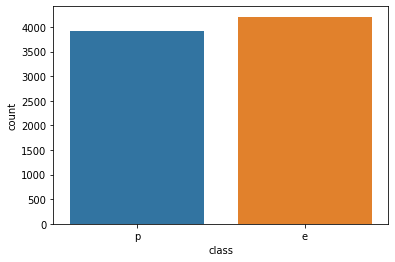

In [31]:
sns.countplot(msdf['class'])

White Coloured and Bell Shaped Mushrooms are highly recommended for eating

Red Coloured Knobbed Shaped Mushrooms are poisonous

<Figure size 1008x432 with 0 Axes>

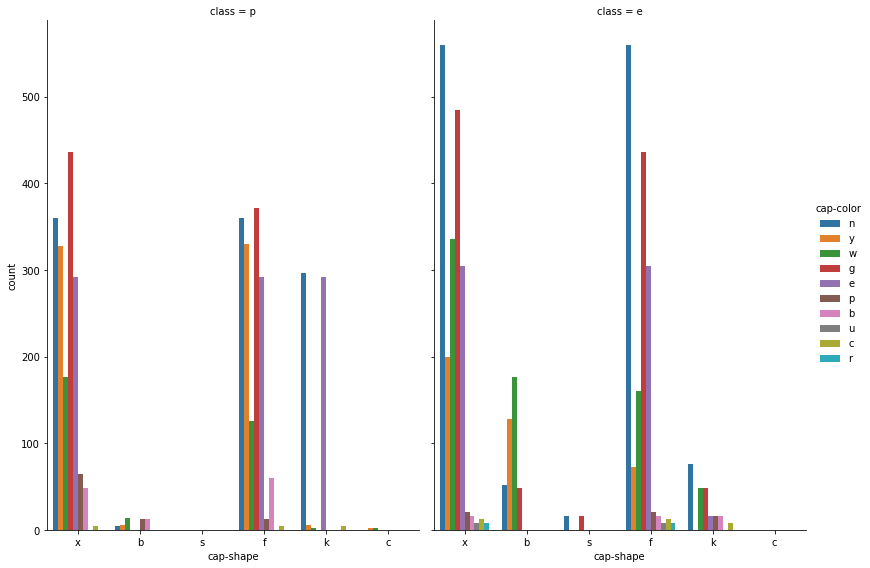

In [36]:
plt.figure(figsize = (14,6))
g = sns.catplot(x="cap-shape", hue="cap-color", col="class",
                data=msdf, kind="count",
                height=8, aspect=.7);

Odourless and Bruised Mushrooms are highly recommended for eating

Fishy Odour with No Bruises Mushrooms are poisonous

<Figure size 1008x432 with 0 Axes>

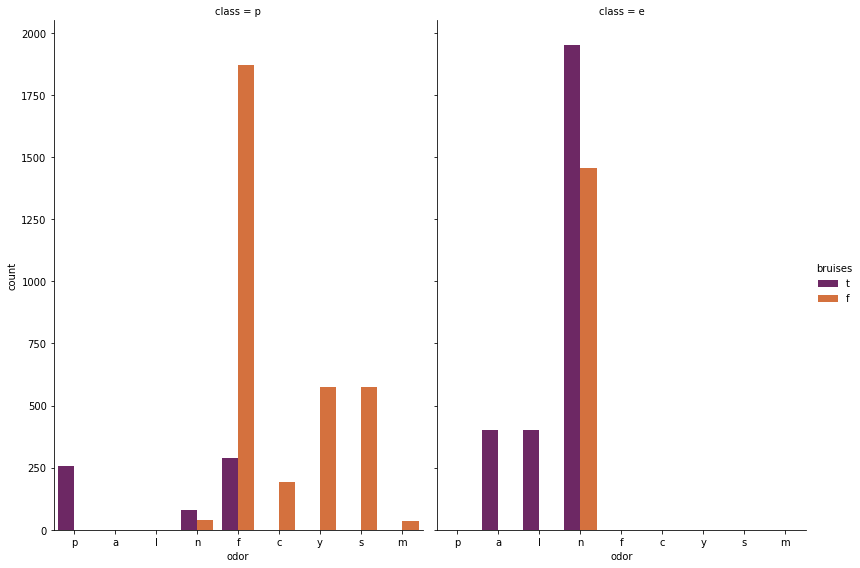

In [41]:
plt.figure(figsize = (14,6))
g = sns.catplot(x="odor", hue="bruises", col="class",
                data=msdf, kind="count",
                height=8, aspect=.7 , palette = 'inferno');

# Data Processing

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
msdf = msdf.apply(LabelEncoder().fit_transform)   
msdf.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [45]:
x = msdf.drop(['class'] , axis = 1)
y = msdf['class']

In [46]:
#Finding best random_state
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
maxAccu=0
maxRS=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    dt = DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    predrf=dt.predict(x_test)
    acc=dt.score(x_train,y_train)
    acc=acc*100
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
    
print('Best accuracy is ',maxAccu, 'on random state ',maxRS)
    

Best accuracy is  100.0 on random state  0


In [47]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.3 , random_state = 0)

# Decision Tree Classifier 

In [48]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 0 , max_depth = 5)
dt.fit(x_train , y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [49]:
dt.score(x_train , y_train)

0.9778403095321843

In [50]:
predictions = dt.predict(x_test)

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , predictions)

0.9827727645611156

# Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 5)

In [53]:
rf.fit(x_train , y_train)
rf.score(x_train , y_train)

0.9910306014773127

In [54]:
predictions = rf.predict(x_test)
rf.score(x_test , y_test)

0.9913863822805579

In [55]:
accuracy_score(y_test , predictions)

0.9913863822805579

**1. Decision Tree Accuracy - 98.2%**

**2. Random Forest Accuracy - 99%**

**Hence, Ramdom Forest is comparitively better**

In [61]:
t1 = np.array([0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3])
t1 = t.reshape(1,-1)
t1.shape

(1, 22)

In [62]:
rf.predict(t)

array([0])

In [63]:
t2 = np.array([0,3,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,3,3])
t2 = t2.reshape(1,-1)

In [64]:
rf.predict(t2)

array([0])

In [65]:
t3 = np.array([5,2,4,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,1])
t3 = t3.reshape(1,-1)

In [66]:
rf.predict(t3)

array([1])

So , all the three tests are right .  